# COGS 118B: Unsupervised Machine Learning Algorithms

## Principle Component Analysis Exploration

In this assignment, I was provided with skeleton code to demonstrate PCA on scatterplot data, and images. I also comment throughout the notebook on the transformations occuring.

In [75]:
import numpy as np
import scipy.io as sio
import matplotlib
import matplotlib.pyplot as plt
from numpy.matlib import repmat
from sklearn.preprocessing import normalize

%matplotlib inline

## `eigsort.m`

In [76]:
# [Vsort,Dsort] = eigsort(V, eigvals)
#
# Sorts a matrix eigenvectors and a array of eigenvalues in order 
# of eigenvalue size, largest eigenvalue first and smallest eigenvalue
# last.
#
# Example usage:
# di, V = np.linarg.eig(L)
# Vnew, Dnew = eigsort(V, di)
#
# Tim Marks 2002

In [77]:
def eigsort(V, eigvals):
    
    # Sort the eigenvalues from largest to smallest. Store the sorted
    # eigenvalues in the column vector lambd.
    lohival = np.sort(eigvals)
    lohiindex = np.argsort(eigvals)
    lambd = np.flip(lohival)
    index = np.flip(lohiindex)
    Dsort = np.diag(lambd)
    
    # Sort eigenvectors to correspond to the ordered eigenvalues. Store sorted
    # eigenvectors as columns of the matrix vsort.
    M = np.size(lambd)
    Vsort = np.zeros((M, M))
    for i in range(M):
        Vsort[:,i] = V[:,index[i]]
    return Vsort, Dsort

## `viewcolumn.m`

In [78]:
# viewcolumn(columnvector);
# VIEWCOLUMN Displays a 60 x 60 grayscale image stored in a column vector.
# Tim Marks 2002

def viewcolumn(columnvector):
    plt.imshow(columnvector.reshape([60, 60], order='F'), cmap=plt.get_cmap('gray'))

In [79]:
# normc(M) normalizes the columns of M to a length of 1.

def normc(Mat):
    return normalize(Mat, norm='l2', axis=0)

## Load .mat files

In [80]:
hw4data = np.loadtxt('hw4data.mat')
hw4bdata = sio.loadmat('hw4bdata.mat')
faces = hw4bdata['faces']
dog = hw4bdata['dog']
x = hw4bdata['x']

## B

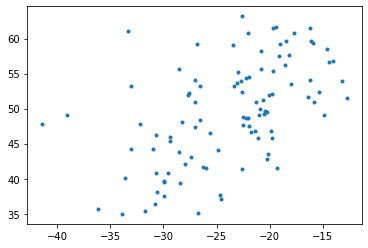

In [81]:
plt.scatter(hw4data[0], hw4data[1],  marker='.')
plt.savefig('hw4B.jpg')

In [82]:
sampleMean = np.mean(hw4data, axis=1)
print(sampleMean)
d, n = hw4data.shape
print(d, n)

[-23.78989551  49.46199088]
2 100


In [83]:
Z = hw4data - np.tile(sampleMean, (n,1)).T
#print(Z.shape)
covmatrix = np.matmul(Z, Z.T)/n-1
#print(covmatrix.shape)
print('Sample covariance matrix: \n',covmatrix)

Sample covariance matrix: 
 [[33.65672591 21.54958275]
 [21.54958275 51.00402712]]


## C

In [84]:
eigvals, V = np.linalg.eig(covmatrix)
print('The eigen values: ',eigvals)
print('The eigen vectors: \n', V)
print('The eigen vector associated with the largest eigenvalue is: ', V[1])
print('The eigen vector associated with the smallest eigenvalue is: ', V[0])

The eigen values:  [19.10072453 65.5600285 ]
The eigen vectors: 
 [[-0.82866972 -0.55973787]
 [ 0.55973787 -0.82866972]]
The eigen vector associated with the largest eigenvalue is:  [ 0.55973787 -0.82866972]
The eigen vector associated with the smallest eigenvalue is:  [-0.82866972 -0.55973787]


In [85]:
Vsort, Dsort = eigsort(V, eigvals)
print(Vsort)
#print(Dsort)

[[-0.55973787 -0.82866972]
 [-0.82866972  0.55973787]]


The sorted and unsorted matrix of eigenvectors have only changed order, as it should have. The previously indicated eigenvector that corespondeds to the higher eigen value, is now listed as the first eigenvector.

## D

In [121]:
x = np.array(([-35, 40]))
#print(x, sampleMean)

c = np.matmul(Vsort.T,(x-sampleMean))

newCoord = np.matmul(Vsort.T, c.T)

print(newCoord)

[-11.21010449  -9.46199088]


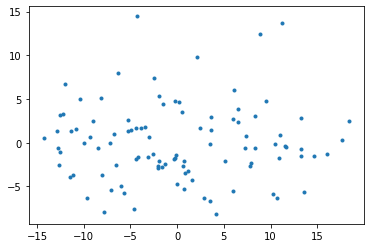

In [128]:
C = np.matmul(Vsort.T, Z)


plt.scatter(C[0], C[1],  marker='.')
plt.savefig('hw4D.jpg')

It seems that the PCA has transformed the data by flipping it, rotating the data, and on a different scale. 

## E

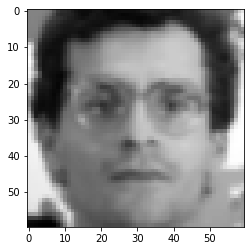

In [88]:
viewcolumn(faces[:,4])

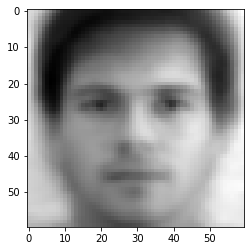

In [89]:
d, n = faces.shape
#print(faces.shape)
faceMean = np.mean(faces, axis=1)
#print(faceMean.shape)
viewcolumn(faceMean)

In [90]:
A = faces - repmat(faceMean, n,1).T
#print(A.shape)

In [91]:
eigvals, eigvec = np.linalg.eig(np.matmul(A.T,A))
V, Dsort = eigsort(eigvec, eigvals)
#print(V.shape, Dsort.shape)

In [92]:
U = np.matmul(A,V)
#print(U.shape)
U = normc(U)
print(U.shape)

(3600, 48)


## F

In [93]:
#print(faces[:,4].shape, faceMean.shape, U.T.shape, (faces[:,4] - faceMean).shape)
c = np.matmul(U.T, (faces[:,4] - faceMean))

print(c.shape)

(48,)


## G

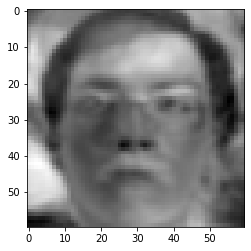

In [94]:
viewcolumn(U[:,2])
plt.savefig('hw4G1.jpg')

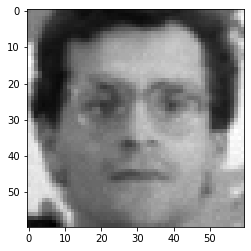

In [95]:

recon = np.matmul(U[:,:], c[:]) + faceMean

viewcolumn(recon)

plt.savefig('hw4G2.jpg')

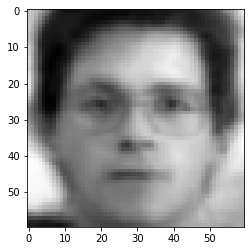

In [96]:
recon = np.matmul(U[:,0:10],c[0:10]) + faceMean

viewcolumn(recon)
plt.savefig('hw4G3.jpg')

## H

[[0.13617021]
 [0.61702128]
 [0.61702128]
 ...
 [0.10212766]
 [0.07659574]
 [0.08085106]]


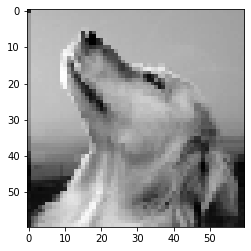

In [97]:
viewcolumn(dog)
print(dog)

In [98]:
c = np.matmul(U.T, (dog[:,0] - faceMean))

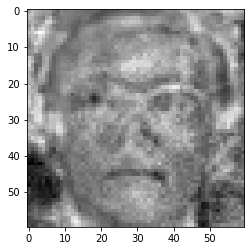

In [99]:
recon = np.matmul(U[:,:],c[:]) + faceMean
viewcolumn(recon)
plt.savefig('hw4H.jpg')

The reconstruction doesn't look like the dog because it was based on the majority of the data/information of faces.

## I

In [103]:
newfaces = np.delete(faces,np.s_[45:48],axis=1)
#newfaces.shape
d, n = newfaces.shape
faceMean = np.mean(newfaces, axis=1)
A = newfaces - repmat(faceMean, n,1).T
eigvals, eigvec = np.linalg.eig(np.matmul(A.T,A))
V, Dsort = eigsort(eigvec, eigvals)
U = np.matmul(A,V)
#print(U.shape)
U = normc(U)

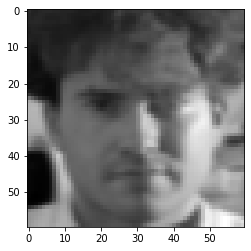

In [104]:
viewcolumn(faces[:,47])
plt.savefig('hw4I2.jpg')

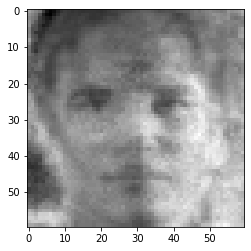

In [106]:
c = np.matmul(U.T, (faces[:,47] - faceMean))
recon = np.matmul(U[:,:], c[:]) + faceMean
viewcolumn(recon)
plt.savefig('hw4I3.jpg')

I would say the face space doesn't necessarily represent a face that isn't included very well, however the factthat it still looks like a face, makes me believe it's not horrible.